In [1]:
#imports
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import numpy as np

In [3]:
# Read the Excel files into a DataFrame, skip the first row (model names)
LR_Acc_1 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_LR_Acc_Matplotlib - 1.xlsx', skiprows=1)
LR_Acc_2 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_LR_Acc_Matplotlib - 2.xlsx', skiprows=1)
LR_Mcc_1 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_LR_Mcc_Matplotlib - 1.xlsx', skiprows=1)
LR_Mcc_2 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_LR_Mcc_Matplotlib - 2.xlsx', skiprows=1)
RF_Acc_1 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_RF_Acc_Matplotlib - 1.xlsx', skiprows=1)
RF_Acc_2 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_RF_Acc_Matplotlib - 2.xlsx', skiprows=1)
RF_Mcc_1 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_RF_Mcc_Matplotlib - 1.xlsx', skiprows=1)
RF_Mcc_2 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_RF_Mcc_Matplotlib - 2.xlsx', skiprows=1)
SVM_Acc_1 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_SVM_Acc_Matplotlib - 1.xlsx', skiprows=1)
SVM_Acc_2 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_SVM_Acc_Matplotlib - 2.xlsx', skiprows=1)
SVM_Mcc_1 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_SVM_Mcc_Matplotlib - 1.xlsx', skiprows=1)
SVM_Mcc_2 = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_SVM_Mcc_Matplotlib - 2.xlsx', skiprows=1)

In [4]:
Acc_1 = {
    0:LR_Acc_1,
    1:RF_Acc_1,
    2:SVM_Acc_1,
}

Acc_2 = {
    0:LR_Acc_2,
    1:RF_Acc_2,
    2:SVM_Acc_2,
}

Mcc_1 = {
    0:LR_Mcc_1,
    1:RF_Mcc_1,
    2:SVM_Mcc_1,
}

Mcc_2 = {
    0:LR_Mcc_2,
    1:RF_Mcc_2,
    2:SVM_Mcc_2,
}

G:\Temporary\TEMP\ipykernel_15440\1426963304.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fold_values = Acc_1[j][Acc[j]['Fold'] == i+1]
G:\Temporary\TEMP\ipykernel_15440\1426963304.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'],


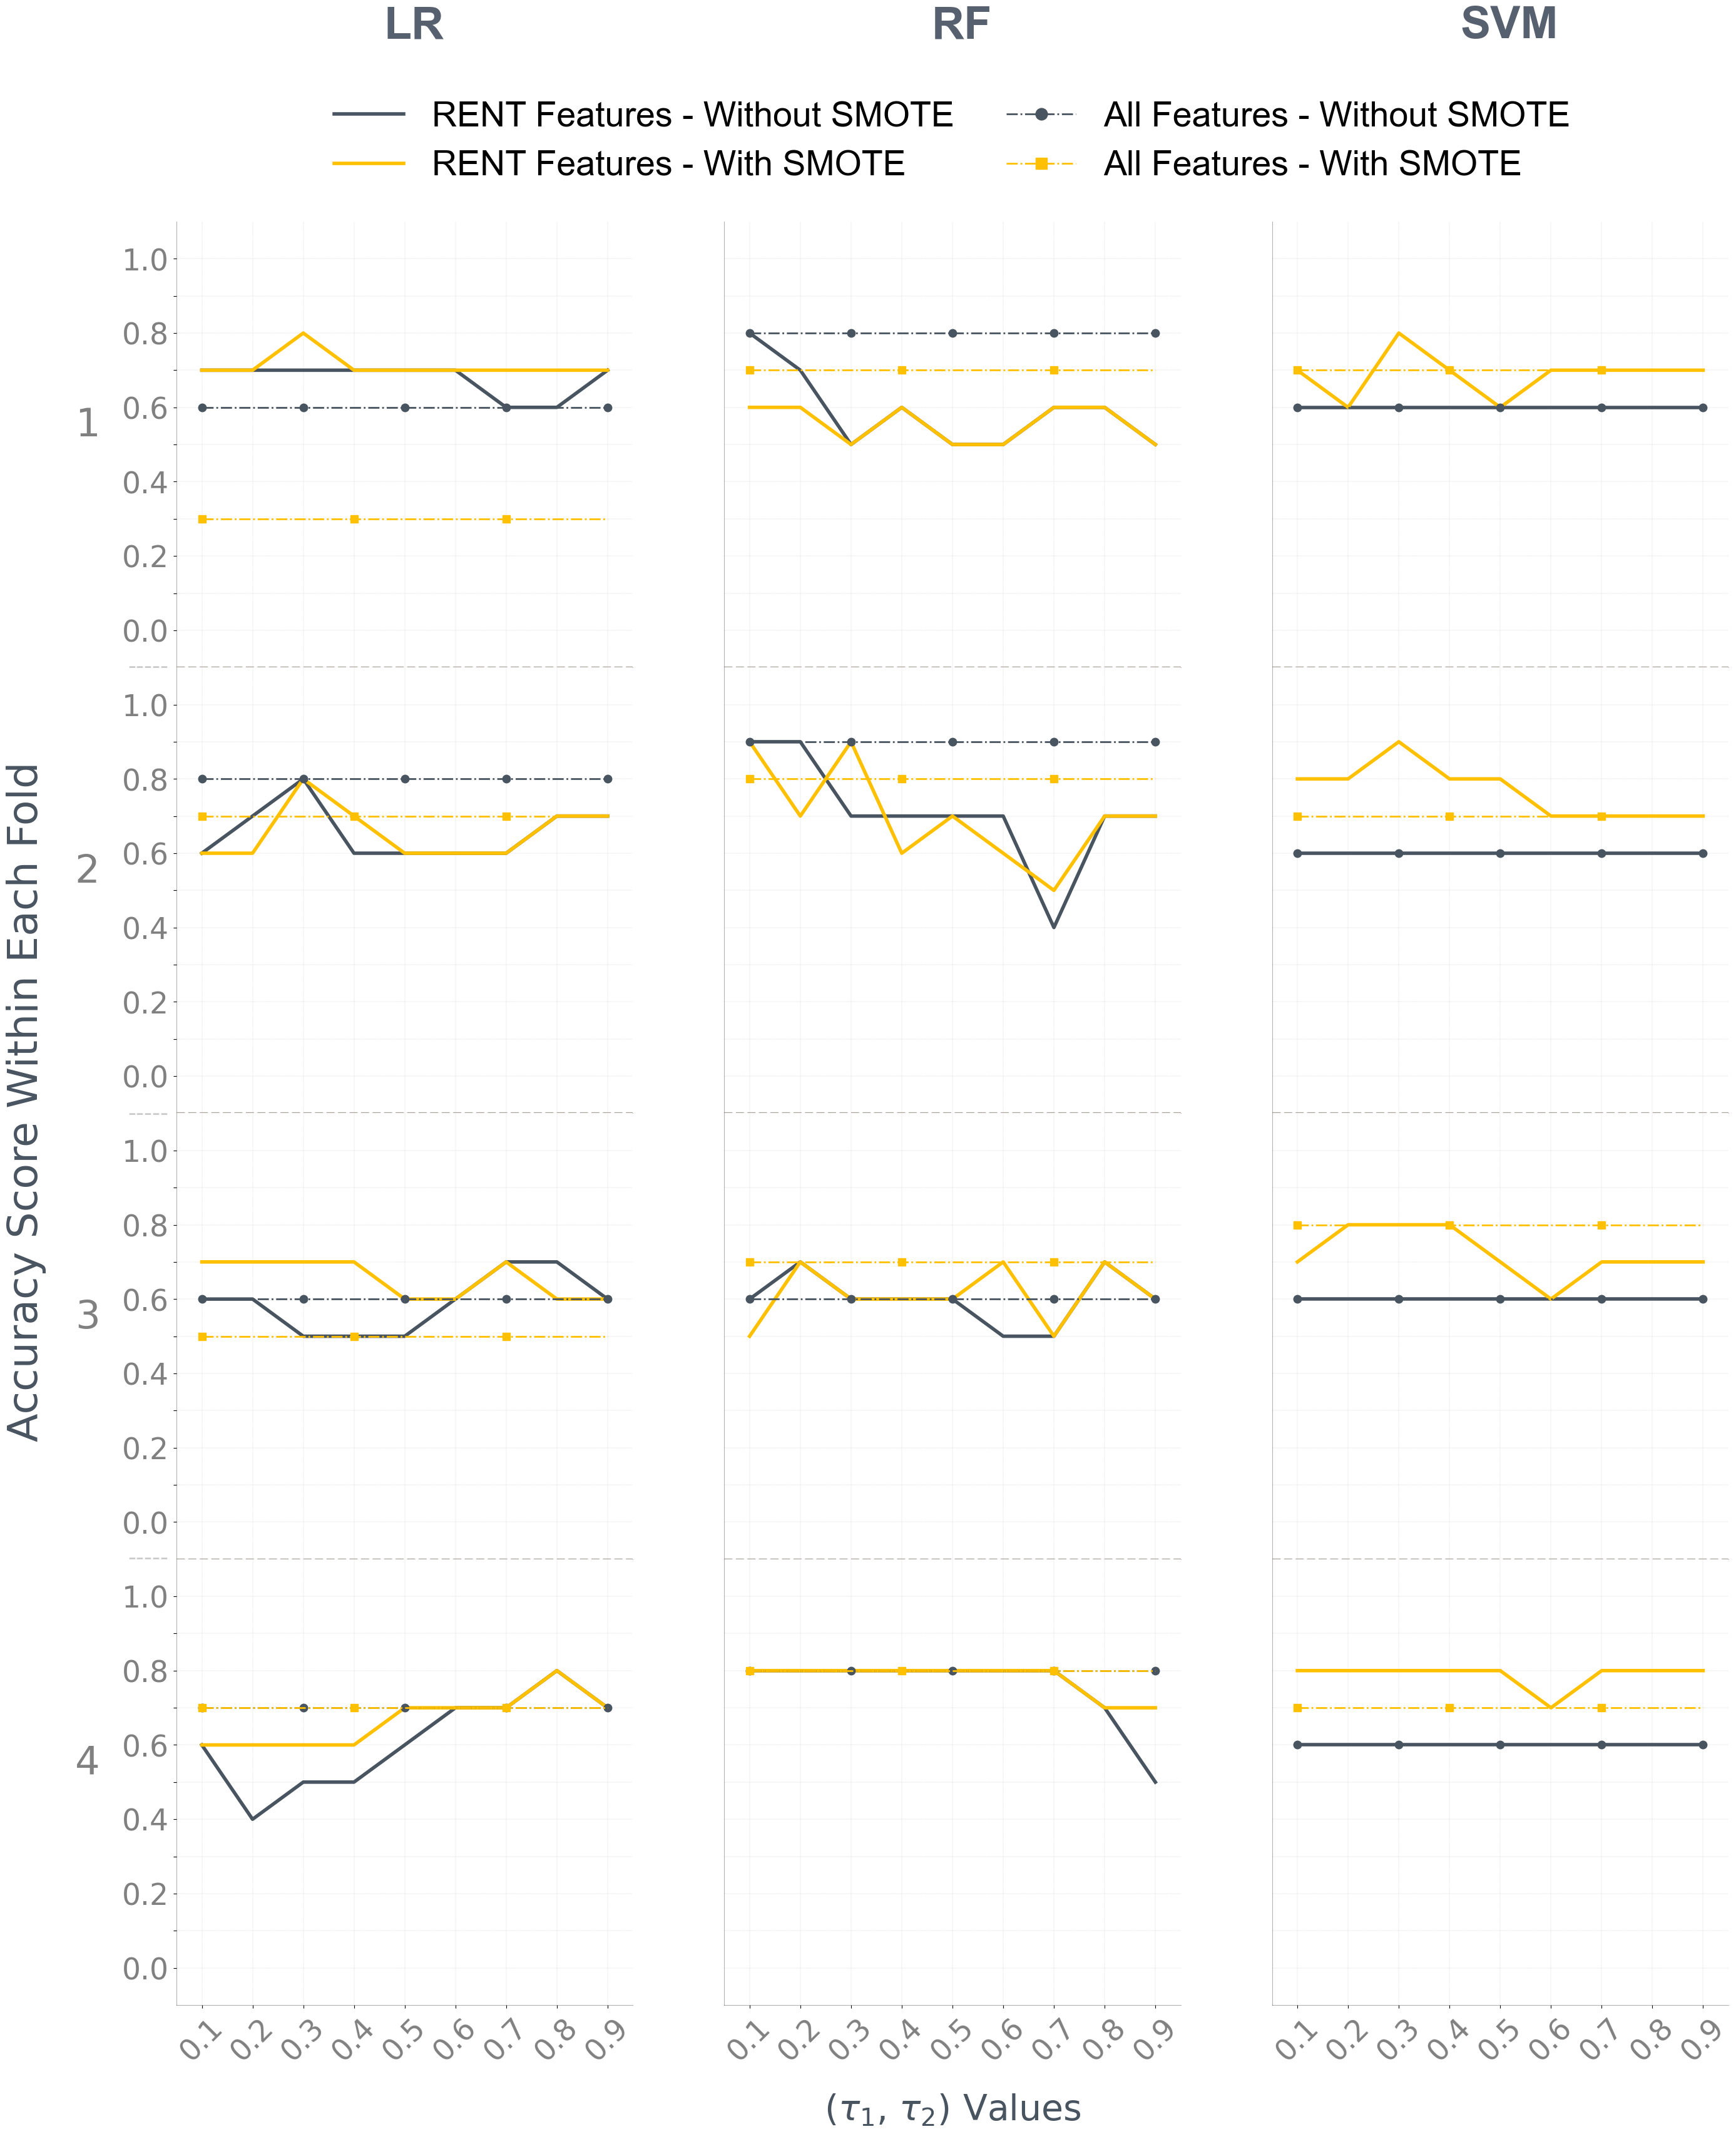

In [98]:
# Iterate through the Acc dictionary to create plots

# Create figure and axes
fig, ax = plt.subplots(4,3, figsize=(32, 37))

for j in range(0,3):
    for i in range(0,4):
    
        # plot the Without_SMOTE line
        fold_values = Acc_1[j][Acc[j]['Fold'] == i+1]
        tau_values = fold_values['TAU_VALUE']

        # plot the line for Without_SMOTE
        Without_SMOTE = fold_values['Without_SMOTE']
        line1, = ax[i][j].plot(tau_values, Without_SMOTE, label='RENT Features - Without SMOTE', color='#485460', 
                               linewidth=4)

        # plot the With_SMOTE line
        With_SMOTE = fold_values['With_SMOTE']
        line2, = ax[i][j].plot(tau_values, With_SMOTE, label='RENT Features - With SMOTE', color='#FFC000', linewidth=4)

        # plot the All_without line
        All_Without_SMOTE = fold_values['All_without']
        line3, = ax[i][j].plot(tau_values, All_Without_SMOTE, label='All Features - Without SMOTE', color='#485460', 
                               linestyle='-.', linewidth=2, marker='o', markersize=9, markevery=2)

        # plot the All_with line
        All_With_SMOTE = fold_values['All_with']
        line4, = ax[i][j].plot(tau_values, All_With_SMOTE, label='All Features - With SMOTE', color='#FFC000', 
                               linestyle='-.', linewidth=2, marker='s', markersize=9, markevery=3)

        if i != 3:
            ax[i][j].set_xticklabels([])
            ax[i][j].spines['bottom'].set_visible(False)
            ax[i][j].axhline(y=-0.1, linestyle='--', linewidth=2.5, color='#aaa69d')

        if j == 0:
            # Set y-axis labels
            ax[i][j].set_ylabel(f'{i+1}', rotation = 0, labelpad=40, color='gray', fontsize=45.0)
            
            # Set y-axis tick labels
            ax[i][j].set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                                     fontsize=34.0)
            
            ax[i][j].tick_params(axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', grid_alpha=0.5)
        else:
            # Set y-axis tick labels
            ax[i][j].set_yticklabels([])
            
            ax[i][j].tick_params(left= False, axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', 
                                 grid_alpha=0.5)

        ax[i][j].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
        ax[i][j].set_xticklabels(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'], rotation = 45, fontsize=34.0)
        ax[i][j].spines['bottom'].set_visible(True)
        ax[i][j].spines['bottom'].set_alpha(0.3)

        
        # Set x-axis and y-axis limits
        ax[i][j].set_xlim(0.05, 0.95)
        ax[i][j].set_ylim(-0.1, 1.1)

        # Set x-axis and y-axis tick locations
        ax[i][j].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        
        for label in ax[i][j].yaxis.get_ticklabels()[1::2]:
                label.set_visible(False)
        

        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_alpha(0.3)

        if i == 0:
            ax[i][j].set_title(f'{model_names[j]}', x=0.52, y=1.4, color='#57606f', 
                            fontdict = {'family':'Arial','color':'darkgray', 'fontweight':'bold', 'fontsize':'52'})

        if i == 3 and j == 1 :
            ax[i][j].set_xlabel(r'($\tau_1$, $\tau_2$) Values', labelpad=30, color='#485460', fontsize=41.0)
            
        if i == 0 and j == 1 :
            ax[i][j].legend(handles=[line1, line2, line3, line4], loc='upper center', frameon=False, facecolor='gray', 
                            prop={'family':'Arial', 'size':'40'}, columnspacing=1.5, ncols=2, markerscale=1.5,
                            bbox_to_anchor=(-0.25, 0.84, 1.5, 0.5))
            
        
        ax[i][j].margins(x=1)

        # Add gridlines
        ax[i][j].grid(True, linestyle='--', linewidth=0.25)
        plt.subplots_adjust(hspace=0.0)

fig.text(0.05, 0.5, "Accuracy Score Within Each Fold", ha="center", va="center", rotation=90, color='#485460', fontsize=48.0)

fig.text(0.111, 0.6878, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)
fig.text(0.111, 0.495, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)
fig.text(0.111, 0.303, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)

plt.savefig(f'LineGraph_ACC_01.png', bbox_inches='tight')
plt.show()

G:\Temporary\TEMP\ipykernel_15440\1531353818.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fold_values = Acc_2[j][Acc[j]['Fold'] == i+1]
G:\Temporary\TEMP\ipykernel_15440\1531353818.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'],
G:\Temporary\TEMP\ipykernel_15440\1531353818.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'],


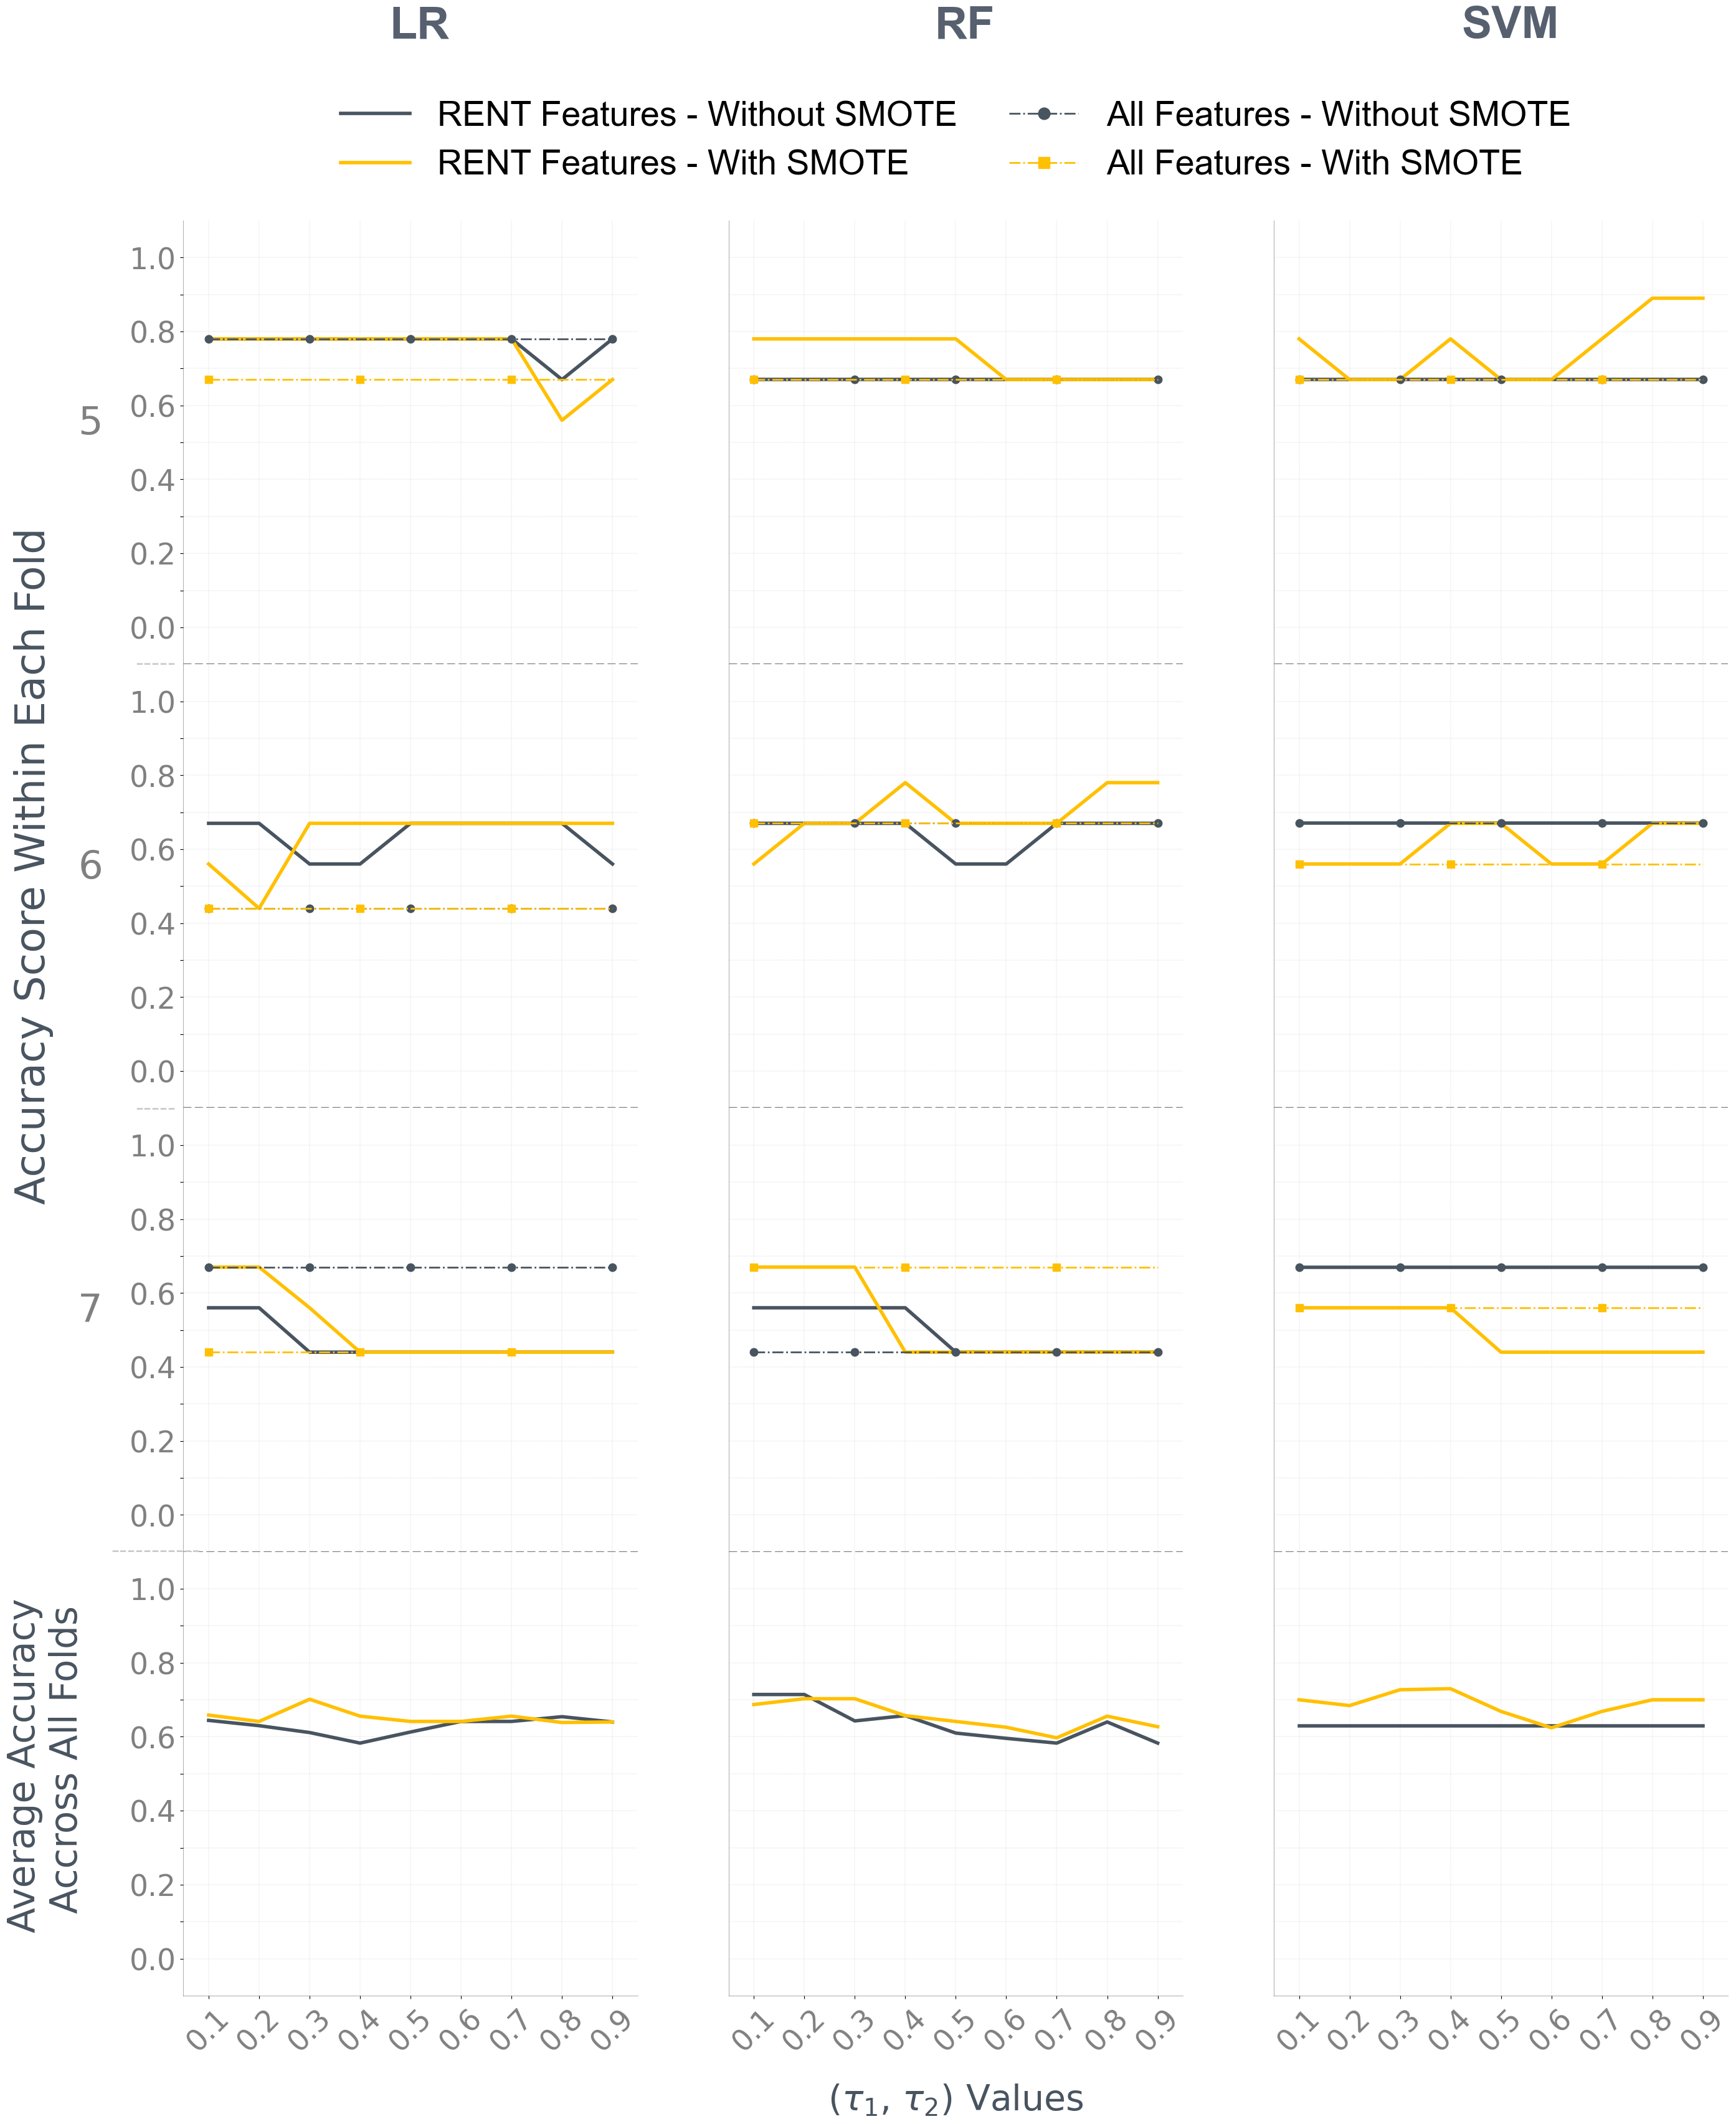

In [99]:
# Iterate through the Acc dictionary to create plots

# Create figure and axes
fig, ax = plt.subplots(4,3, figsize=(32, 37))

for j in range(0,3):
    for i in range(0,4):
    
        if i != 3:
            # plot the Without_SMOTE line
            fold_values = Acc_2[j][Acc[j]['Fold'] == i+1]
            tau_values = fold_values['TAU_VALUE']

            # plot the line for Without_SMOTE
            Without_SMOTE = fold_values['Without_SMOTE']
            line1, = ax[i][j].plot(tau_values, Without_SMOTE, label='RENT Features - Without SMOTE', color='#485460', 
                                   linewidth=4)

            # plot the With_SMOTE line
            With_SMOTE = fold_values['With_SMOTE']
            line2, = ax[i][j].plot(tau_values, With_SMOTE, label='RENT Features - With SMOTE', color='#FFC000', linewidth=4)

            # plot the All_without line
            All_Without_SMOTE = fold_values['All_without']
            line3, = ax[i][j].plot(tau_values, All_Without_SMOTE, label='All Features - Without SMOTE', color='#485460', 
                                   linestyle='-.', linewidth=2, marker='o', markersize=9, markevery=2)

            # plot the All_with line
            All_With_SMOTE = fold_values['All_with']
            line4, = ax[i][j].plot(tau_values, All_With_SMOTE, label='All Features - With SMOTE', color='#FFC000', 
                                   linestyle='-.', linewidth=2, marker='s', markersize=9, markevery=3)

            if i != 3:
                ax[i][j].set_xticklabels([])
                ax[i][j].spines['bottom'].set_visible(False)
                ax[i][j].axhline(y=-0.1, linestyle='--', linewidth=2.5, color='gray')
                
            if j == 0:
                # Set y-axis labels
                ax[i][j].set_ylabel(f'{i+5}', rotation = 0, labelpad=45, color='gray', fontsize=45.0)

                # Set y-axis tick labels
                ax[i][j].set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                                         fontsize=34.0)

                ax[i][j].tick_params(axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', grid_alpha=0.5)
            else:
                # Set y-axis tick labels
                ax[i][j].set_yticklabels([])

                ax[i][j].tick_params(left= False, axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', 
                                     grid_alpha=0.5)
        
        else:
            # plot the Average line for Without_SMOTE
            Without_SMOTE = fold_values['RENT_Avg_Without_SMOTE']
            line1, = ax[i][j].plot(tau_values, Without_SMOTE, label='RENT Features - Without SMOTE', color='#485460', 
                                   linewidth=4)
            # plot the Average line for With_SMOTE
            With_SMOTE = fold_values['RENT_Avg_With_SMOTE']
            line2, = ax[i][j].plot(tau_values, With_SMOTE, label='RENT Features - With SMOTE', color='#FFC000', linewidth=4)
            
            ax[i][j].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
            ax[i][j].set_xticklabels(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'], rotation=45, fontsize=34.0)
            ax[i][j].spines['bottom'].set_visible(True)
            ax[i][j].spines['bottom'].set_alpha(0.3)
            
            ax[i][j].set_ylabel('')
            
            if j == 0:

                # Set y-axis tick labels
                ax[i][j].set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                                         fontsize=34.0)

                ax[i][j].tick_params(axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', grid_alpha=0.5)
            else:
                # Set y-axis tick labels
                ax[i][j].set_yticklabels([])

                ax[i][j].tick_params(left= False, axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', 
                                     grid_alpha=0.5)

        
        # Set x-axis and y-axis limits
        ax[i][j].set_xlim(0.05, 0.95)
        ax[i][j].set_ylim(-0.1, 1.1)

        # Set x-axis and y-axis tick locations
        ax[i][j].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

        for label in ax[i][j].yaxis.get_ticklabels()[1::2]:
            label.set_visible(False)

        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_alpha(0.3)

        if i == 0:
            ax[i][j].set_title(f'{model_names[j]}', x=0.52, y=1.4, color='#57606f', 
                            fontdict = {'family':'Arial','color':'darkgray', 'fontweight':'bold', 'fontsize':'52'})

        if i == 3 and j == 1 :
            ax[i][j].set_xlabel(r'($\tau_1$, $\tau_2$) Values', labelpad=30, color='#485460', fontsize=41.0)
            
        if i == 0 and j == 1 :
            ax[i][j].legend(handles=[line1, line2, line3, line4], loc='upper center', frameon=False, facecolor='gray', 
                            prop={'family':'Arial', 'size':'40'}, columnspacing=1.5, ncols=2, markerscale=1.5,
                            bbox_to_anchor=(-0.25, 0.84, 1.5, 0.5))
            
        # ax[i][j].tick_params(axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', grid_alpha=0.5)
        ax[i][j].margins(x=1)

        # Add gridlines
        ax[i][j].grid(True, linestyle='--', linewidth=0.25)
        plt.subplots_adjust(hspace=0.0)

fig.text(0.05, 0.6, "Accuracy Score Within Each Fold", ha="center", va="center", rotation=90, color='#485460', fontsize=48.0)
fig.text(0.056, 0.21, "Average Accuracy\n Accross All Folds", ha="center", va="center", rotation=90, color='#485460', fontsize=43.0)

fig.text(0.111, 0.6878, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)
fig.text(0.111, 0.495, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)
fig.text(0.111, 0.303, "-----------", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)

plt.savefig(f'LineGraph_ACC_02.png', bbox_inches='tight')
plt.show()

G:\Temporary\TEMP\ipykernel_15440\1420795263.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fold_values = Mcc_1[j][Acc[j]['Fold'] == i+1]


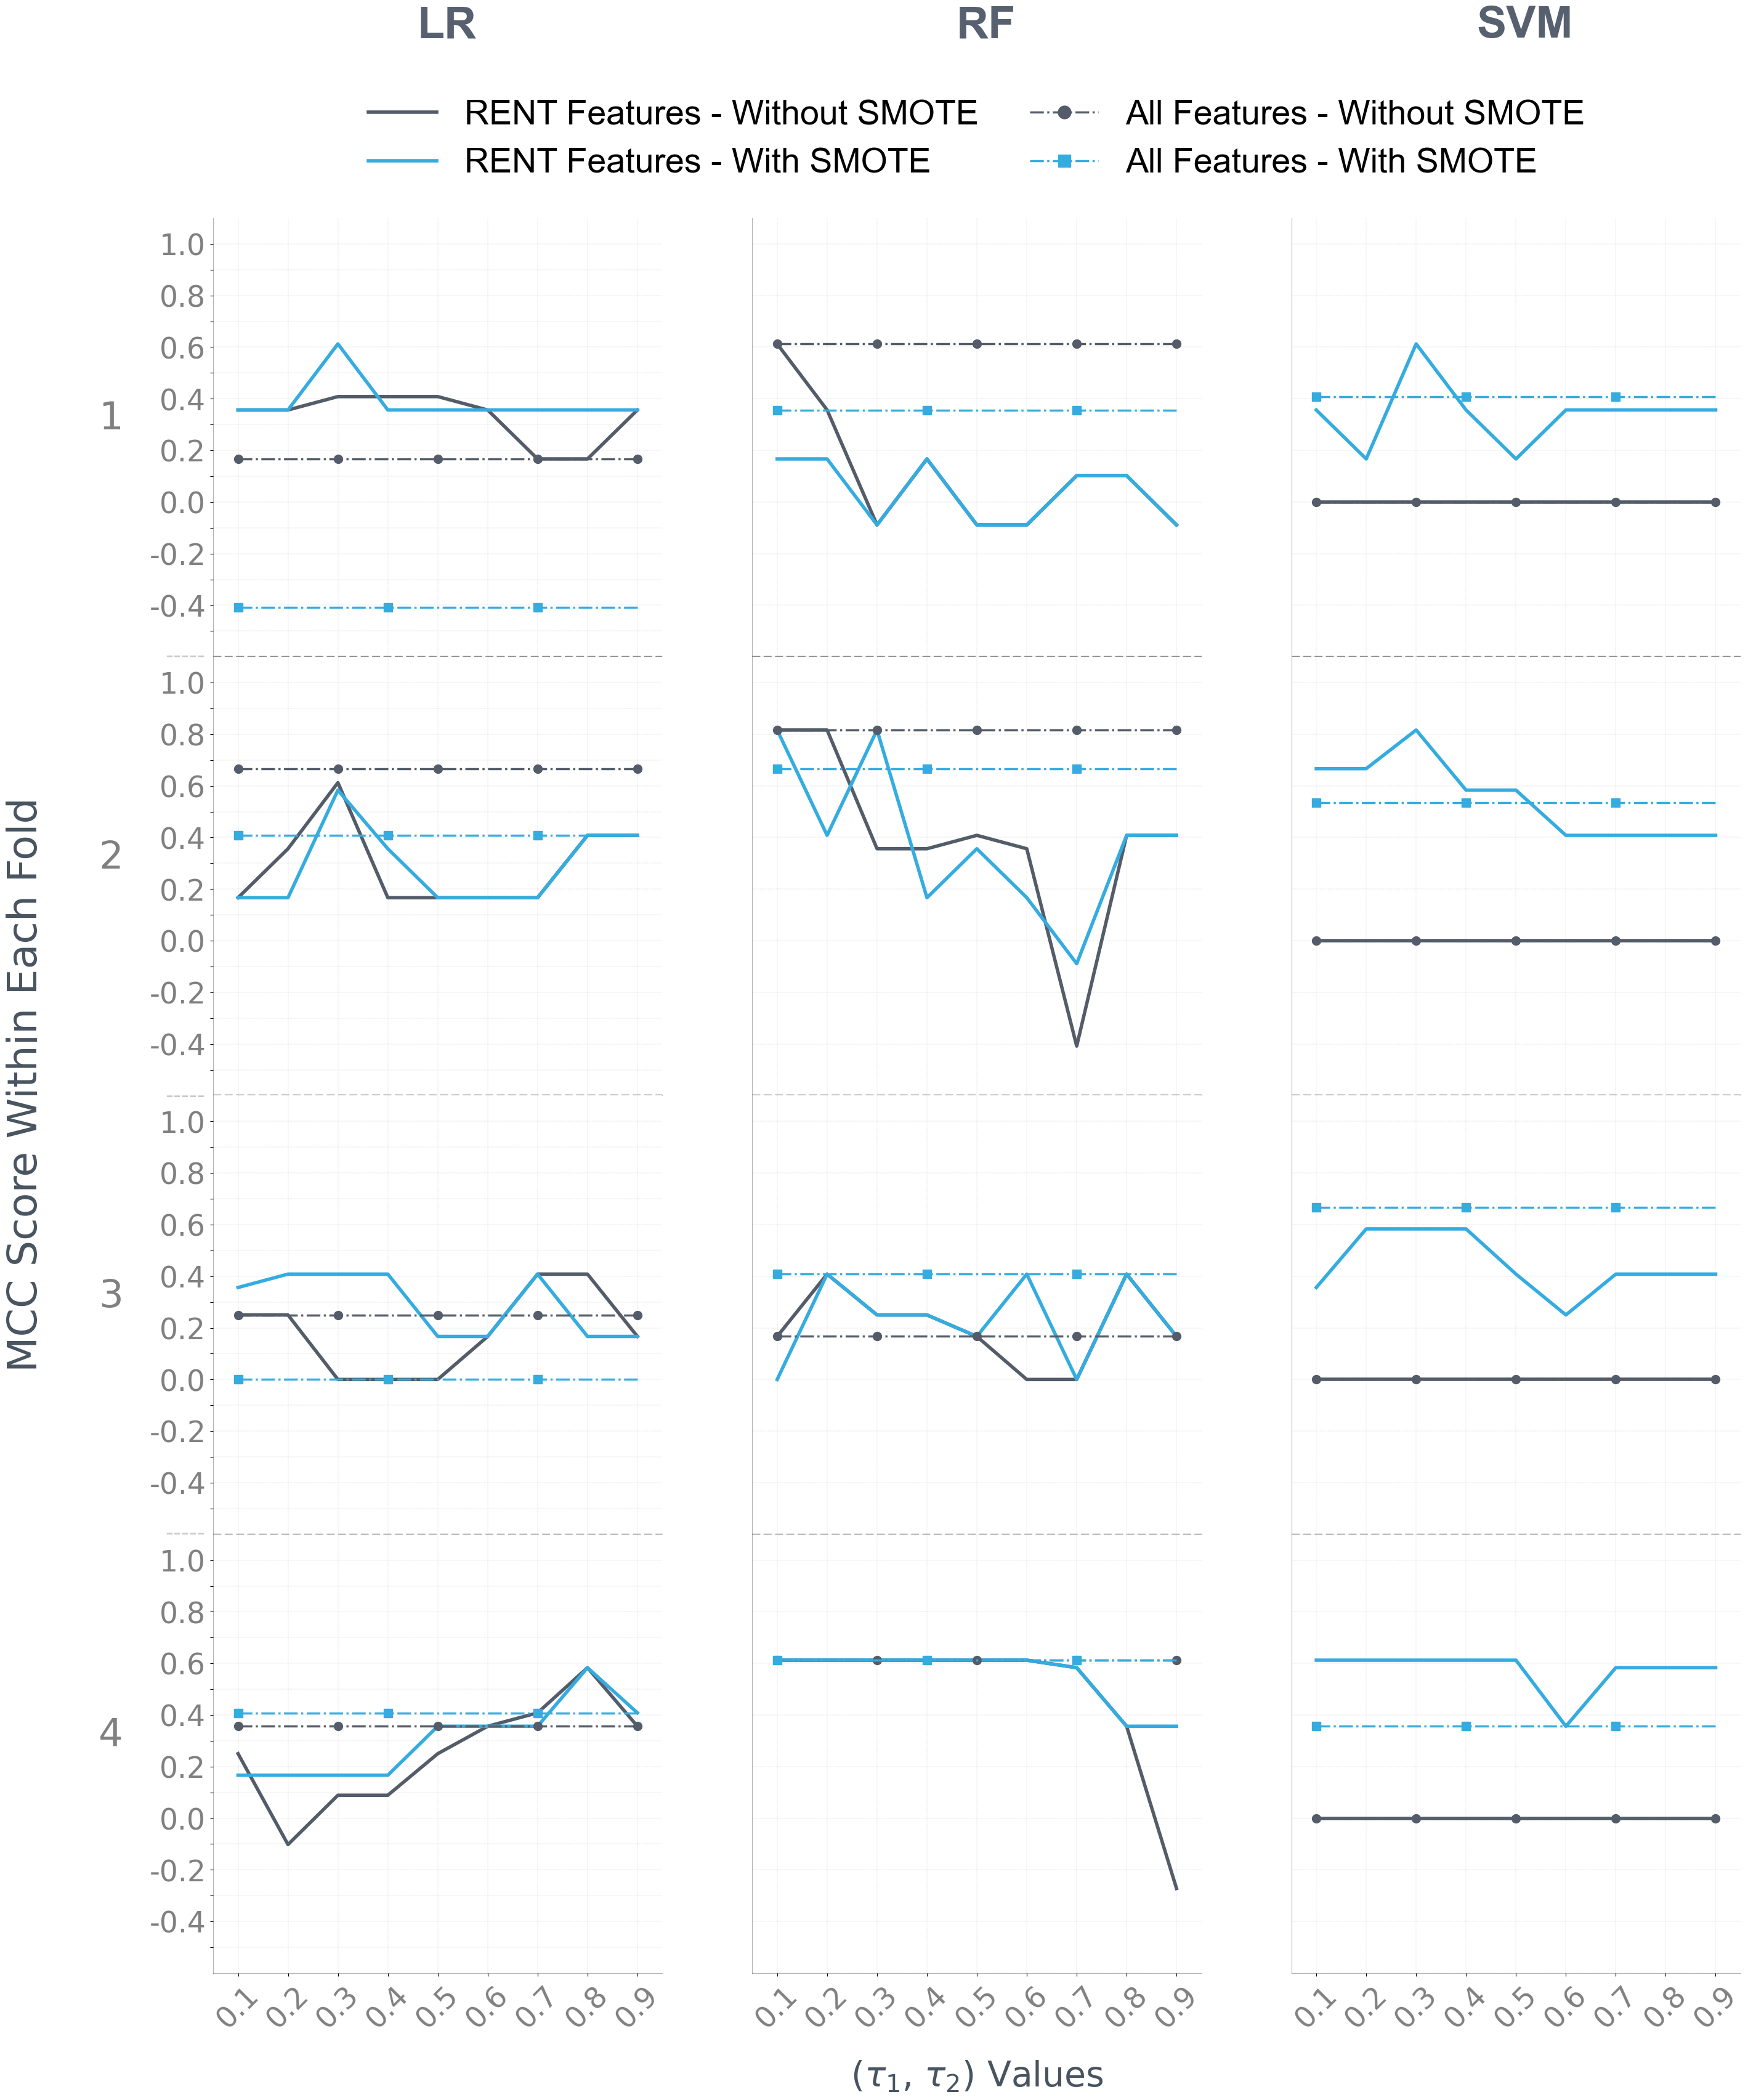

In [132]:
# Iterate through the Acc dictionary to create plots

# Create figure and axes
fig, ax = plt.subplots(4,3, figsize=(32, 37))

for j in range(0,3):
    for i in range(0,4):
    
        # plot the Without_SMOTE line
        fold_values = Mcc_1[j][Acc[j]['Fold'] == i+1]
        tau_values = fold_values['TAU_VALUE']

        # plot the line for Without_SMOTE
        Without_SMOTE = fold_values['Without_SMOTE']
        line1, = ax[i][j].plot(tau_values, Without_SMOTE, label='RENT Features - Without SMOTE', color='#535c68', 
                               linewidth=4)

        # plot the With_SMOTE line
        With_SMOTE = fold_values['With_SMOTE']
        line2, = ax[i][j].plot(tau_values, With_SMOTE, label='RENT Features - With SMOTE', color='#34ace0', linewidth=4)

        # plot the All_without line
        All_Without_SMOTE = fold_values['All_without']
        line3, = ax[i][j].plot(tau_values, All_Without_SMOTE, label='All Features - Without SMOTE', color='#535c68', 
                               linestyle='-.', linewidth=2.5, marker='o', markersize=10, markevery=2)

        # plot the All_with line
        All_With_SMOTE = fold_values['All_with']
        line4, = ax[i][j].plot(tau_values, All_With_SMOTE, label='All Features - With SMOTE', color='#34ace0', 
                               linestyle='-.', linewidth=2.5, marker='s', markersize=10, markevery=3)

        if i != 3:
            ax[i][j].set_xticklabels([])
            ax[i][j].spines['bottom'].set_visible(False)
            ax[i][j].axhline(y=-0.6, linestyle='--', linewidth=2.5, color='gray')
            
        if j == 0:
            # Set x-axis and y-axis tick locations
            ax[i][j].set_yticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

            # Set y-axis tick labels
            ax[i][j].set_yticklabels(['-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                                     fontsize=34.0)
            
            # Set y-axis labels
            ax[i][j].set_ylabel(f'{i+1}', rotation = 0, labelpad=45, color='gray', fontsize=45.0)

            ax[i][j].tick_params(axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', grid_alpha=0.5)
        else:
            # Set y-axis tick labels
            ax[i][j].set_yticklabels([])

            ax[i][j].tick_params(left= False, axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', 
                                 grid_alpha=0.5)

        
        for label in ax[i][j].yaxis.get_ticklabels()[::2]:
            label.set_visible(False)

        ax[i][j].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
        ax[i][j].set_xticklabels(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'], rotation=45, fontsize=34.0)
        ax[i][j].spines['bottom'].set_visible(True)
        ax[i][j].spines['bottom'].set_alpha(0.3)

        
        # Set x-axis and y-axis limits
        ax[i][j].set_xlim(0.05, 0.95)
        ax[i][j].set_ylim(-0.6, 1.1)


        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_alpha(0.3)

        if i == 0:
            ax[i][j].set_title(f'{model_names[j]}', x=0.52, y=1.4, color='#57606f', 
                            fontdict = {'family':'Arial','color':'darkgray', 'fontweight':'bold', 'fontsize':'52'})

        if i == 3 and j == 1 :
            ax[i][j].set_xlabel(r'($\tau_1$, $\tau_2$) Values', labelpad=30, color='#485460', fontsize=41.0)
            
        if i == 0 and j == 1 :
            ax[i][j].legend(handles=[line1, line2, line3, line4], loc='upper center', frameon=False, facecolor='gray', 
                            prop={'family':'Arial', 'size':'40'}, columnspacing=1.5, ncols=2, markerscale=1.5,
                            bbox_to_anchor=(-0.25, 0.84, 1.5, 0.5))
        
        ax[i][j].margins(x=1)

        # Add gridlines
        ax[i][j].grid(True, linestyle='--', linewidth=0.25)
        plt.subplots_adjust(hspace=0.0)

fig.text(0.03, 0.5, "MCC Score Within Each Fold", ha="center", va="center", rotation=90, color='#485460', fontsize=48.0)

fig.text(0.111, 0.6878, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)
fig.text(0.111, 0.495, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)
fig.text(0.111, 0.303, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)

plt.savefig(f'LineGraph_MCC_01.png', bbox_inches='tight')
plt.show()

G:\Temporary\TEMP\ipykernel_15440\2220874727.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fold_values = Mcc_2[j][Acc[j]['Fold'] == i+1]


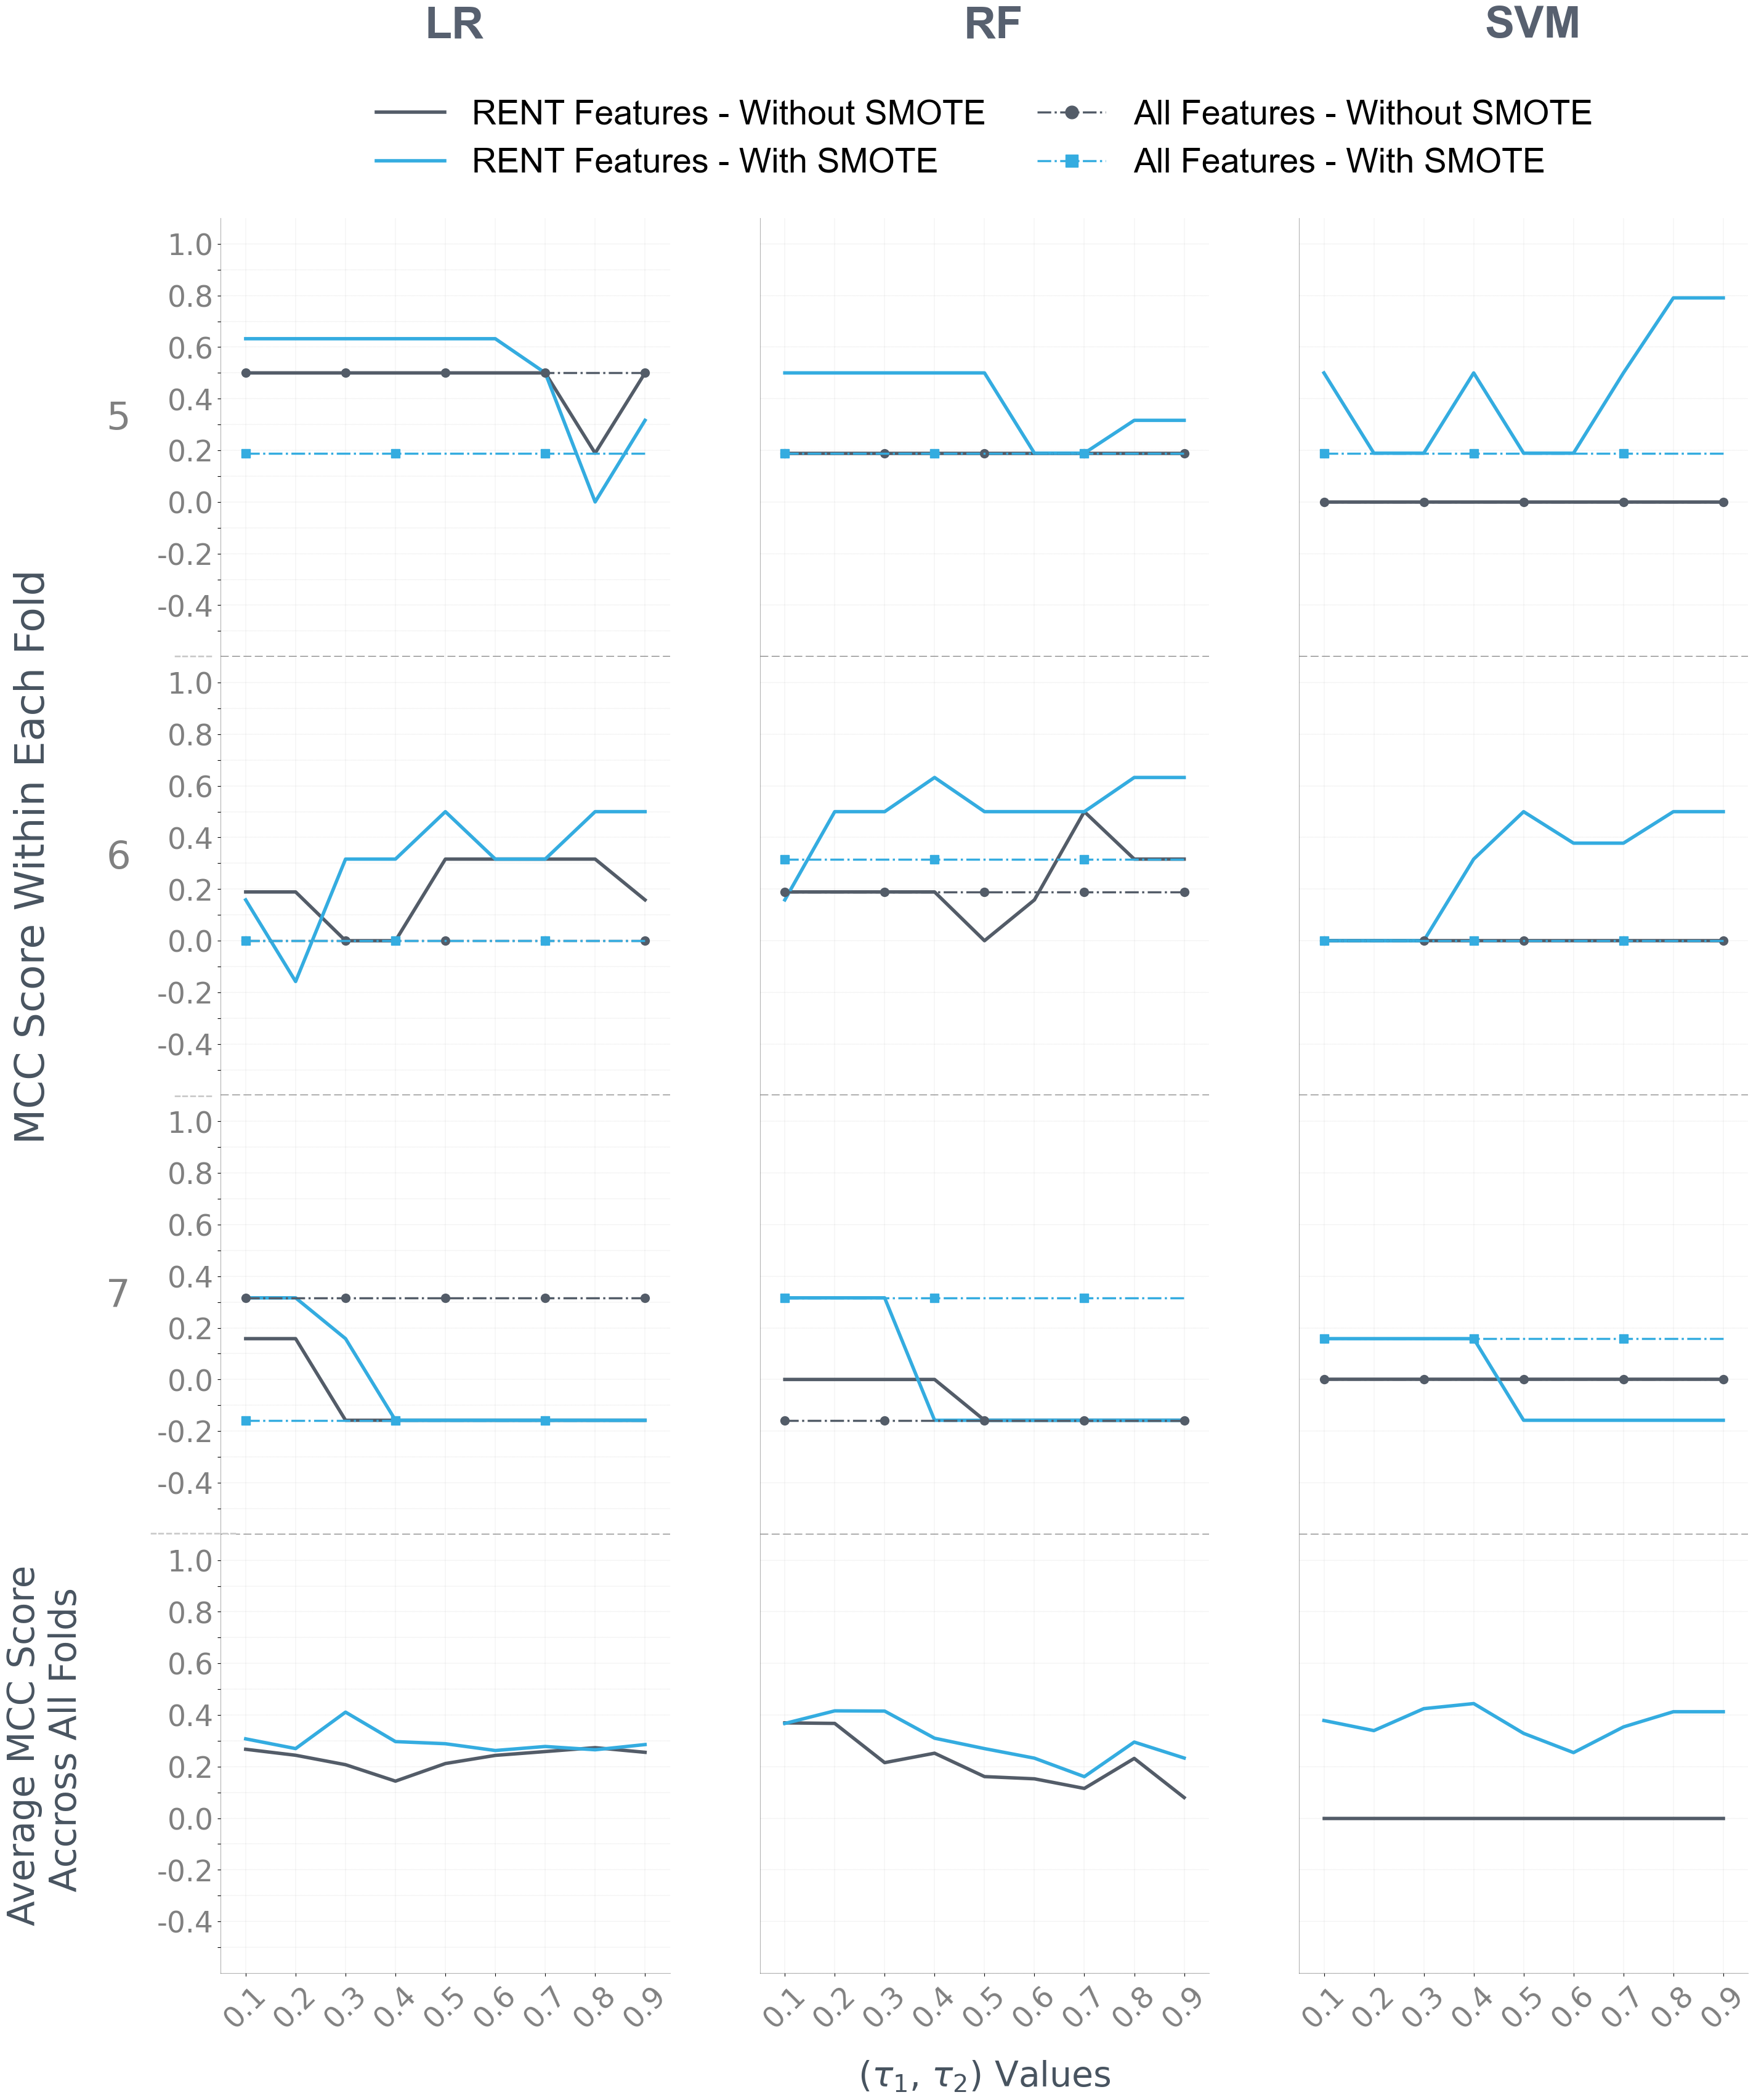

In [133]:
# Iterate through the Acc dictionary to create plots

# Create figure and axes
fig, ax = plt.subplots(4,3, figsize=(32, 37))

for j in range(0,3):
    for i in range(0,4):
    
        if i != 3:
            # plot the Without_SMOTE line
            fold_values = Mcc_2[j][Acc[j]['Fold'] == i+1]
            tau_values = fold_values['TAU_VALUE']

            # plot the line for Without_SMOTE
            Without_SMOTE = fold_values['Without_SMOTE']
            line1, = ax[i][j].plot(tau_values, Without_SMOTE, label='RENT Features - Without SMOTE', color='#535c68', 
                                   linewidth=4)

            # plot the With_SMOTE line
            With_SMOTE = fold_values['With_SMOTE']
            line2, = ax[i][j].plot(tau_values, With_SMOTE, label='RENT Features - With SMOTE', color='#34ace0', linewidth=4)

            # plot the All_without line
            All_Without_SMOTE = fold_values['All_without']
            line3, = ax[i][j].plot(tau_values, All_Without_SMOTE, label='All Features - Without SMOTE', color='#535c68', 
                                   linestyle='-.', linewidth=2.5, marker='o', markersize=10, markevery=2)

            # plot the All_with line
            All_With_SMOTE = fold_values['All_with']
            line4, = ax[i][j].plot(tau_values, All_With_SMOTE, label='All Features - With SMOTE', color='#34ace0', 
                                   linestyle='-.', linewidth=2.5, marker='s', markersize=10, markevery=3)

            if i != 3:
                ax[i][j].set_xticklabels([])
                ax[i][j].spines['bottom'].set_visible(False)
                ax[i][j].axhline(y=-0.6, linestyle='--', linewidth=2.5, color='gray')
                
            if j == 0:
                # Set x-axis and y-axis tick locations
                ax[i][j].set_yticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

                # Set y-axis tick labels
                ax[i][j].set_yticklabels(['-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                                         fontsize=34.0)

                # Set y-axis labels
                ax[i][j].set_ylabel(f'{i+5}', rotation = 0, labelpad=45, color='gray', fontsize=45.0)

                ax[i][j].tick_params(axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', grid_alpha=0.5)
            else:
                # Set y-axis tick labels
                ax[i][j].set_yticklabels([])

                ax[i][j].tick_params(left= False, axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', 
                                     grid_alpha=0.5)
        
        else:
            # plot the Average line for Without_SMOTE
            Without_SMOTE = fold_values['RENT_Avg_Without_SMOTE']
            line1, = ax[i][j].plot(tau_values, Without_SMOTE, label='RENT Features - Without SMOTE', color='#535c68', 
                                   linewidth=4)
            # plot the Average line for With_SMOTE
            With_SMOTE = fold_values['RENT_Avg_With_SMOTE']
            line2, = ax[i][j].plot(tau_values, With_SMOTE, label='RENT Features - With SMOTE', color='#34ace0', linewidth=4)
            
            ax[i][j].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
            ax[i][j].set_xticklabels(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'], rotation=45, fontsize=34.0)
            ax[i][j].spines['bottom'].set_visible(True)
            ax[i][j].spines['bottom'].set_alpha(0.3)
            
            
            if j == 0:
                # Set x-axis and y-axis tick locations
                ax[i][j].set_yticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

                # Set y-axis tick labels
                ax[i][j].set_yticklabels(['-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                                         fontsize=34.0)

                ax[i][j].tick_params(axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', grid_alpha=0.5)
            else:
                # Set y-axis tick labels
                ax[i][j].set_yticklabels([])

                ax[i][j].tick_params(left= False, axis='both', which='major', pad=5, labelcolor='gray', grid_color='gray', 
                                     grid_alpha=0.5)

        for label in ax[i][j].yaxis.get_ticklabels()[::2]:
            label.set_visible(False)
        
        # Set x-axis and y-axis limits
        ax[i][j].set_xlim(0.05, 0.95)
        ax[i][j].set_ylim(-0.6, 1.1)


        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_alpha(0.3)

        if i == 0:
            ax[i][j].set_title(f'{model_names[j]}', x=0.52, y=1.4, color='#57606f', 
                            fontdict = {'family':'Arial','color':'darkgray', 'fontweight':'bold', 'fontsize':'52'})

        if i == 3 and j == 1 :
            ax[i][j].set_xlabel(r'($\tau_1$, $\tau_2$) Values', labelpad=30, color='#485460', fontsize=41.0)
            
        if i == 0 and j == 1 :
            ax[i][j].legend(handles=[line1, line2, line3, line4], loc='upper center', frameon=False, facecolor='gray', 
                            prop={'family':'Arial', 'size':'40'}, columnspacing=1.5, ncols=2, markerscale=1.5,
                            bbox_to_anchor=(-0.25, 0.84, 1.5, 0.5))
            
        ax[i][j].margins(x=1)

        # Add gridlines
        ax[i][j].grid(True, linestyle='--', linewidth=0.25)
        plt.subplots_adjust(hspace=0.0)

fig.text(0.03, 0.6, "MCC Score Within Each Fold", ha="center", va="center", rotation=90, color='#485460', fontsize=48.0)
fig.text(0.036, 0.21, "Average MCC Score\n Accross All Folds", ha="center", va="center", rotation=90, color='#485460', fontsize=43.0)

fig.text(0.111, 0.6878, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)
fig.text(0.111, 0.495, "-----", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)
fig.text(0.111, 0.303, "-----------", ha="center", va="center", rotation=0, color='#CACACA', fontsize=26.0)

plt.savefig(f'LineGraph_MCC_02.png', bbox_inches='tight')
plt.show()